### Importing required libraries

In [1]:
from src.models.dynamics_models import *
from src.models.cell_models import *
from src.utils import *
import ufl

### Defining a domain, cell model and the whole model and visualizing initial data

In [2]:
domain = rectangle(3, 3, 32, 32)
x = ufl.SpatialCoordinate(domain)

In [3]:
class CellModel(Noble):
    def apply_current(
        self,
    ):
        locator = lambda x: (x[0] - 1) ** 2 < 0.1**2
        cells = fem.locate_dofs_geometrical(self.V1, locator)
        self.I_app.x.array[cells] = np.full_like(cells, 10)
        self.I_app_duration = 20

In [4]:
class Model(MonodomainModel):
    # def initial_V_m(self):
    #    def value(x):
    #        return cell_model.V_REST * (
    #            1 - np.exp(-((x[0] - 0) ** 2) * 20 - (x[1] - 0) ** 2 * 20)
    #        )
    #
    #    self.V_m_n.interpolate(value)

    def initial_V_m(self):
        self.V_m_n.x.array[:] = -85

    def conductivity(self):
        x_c, y_c = 1, 1
        fibres = (
            (x[1] - y_c) / ((x[0] - x_c) ** 2 + (x[1] - y_c) ** 2 + 1),
            -(x[0] - x_c) / ((x[0] - x_c) ** 2 + (x[1] - y_c) ** 2 + 1),
        )

        # Muscle fibres
        self.fibres = ufl.as_vector(fibres)

        # Healthy conductivities
        self.M_i = self.SIGMA_IT * ufl.Identity(2) + (
            self.SIGMA_IN - self.SIGMA_IT
        ) * ufl.outer(self.fibres, self.fibres)
        # self.M_e = self.SIGMA_ET * ufl.Identity(2) + (
        #    self.SIGMA_EN - self.SIGMA_ET
        # ) * ufl.outer(self.fibres, self.fibres)

In [5]:
cell_model = CellModel(domain)
model = Model(domain, cell_model)

In [6]:
cell_model.plot_I_app()

Widget(value='<iframe src="http://localhost:45203/index.html?ui=P_0x7f51001eccd0_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [7]:
model.solve(
    T=500,
    steps=1000,
    lambda_=0.8,
    save_to="demo.mp4",
    signal_point=[2.0, 2.0, 0.0],
)

Solving problem: 100%|██████████| 1000/1000 [20:33<00:00,  1.23s/it]


### Plotting a fiber orientations

In [8]:
x_c, y_c = 1, 1
plot_vector_field(
    domain,
    lambda x: (
        (x[1] - y_c) / ((x[0] - x_c) ** 2 + (x[1] - y_c) ** 2 + 1),
        -(x[0] - x_c) / ((x[0] - x_c) ** 2 + (x[1] - y_c) ** 2 + 1),
        0,
    ),
    0.03,
)

Widget(value='<iframe src="http://localhost:45203/index.html?ui=P_0x7f50edc03bd0_1&reconnect=auto" class="pyvi…

### Plotting a final plot of transmembrane potential

In [9]:
plot_function(model.V_m_n, "V_m", show_mesh=False)

Widget(value='<iframe src="http://localhost:45203/index.html?ui=P_0x7f5063a8da50_2&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

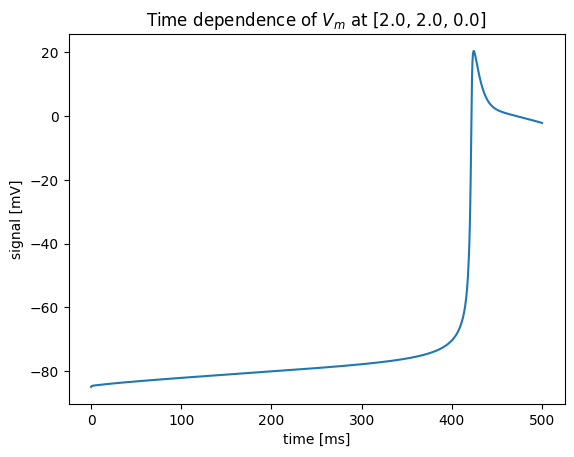

In [10]:
model.plot_signal()

### Plotting a transmembrane potential solution of a cell model

In [11]:
cell_model.visualize(1000, -60, 0)